# NetworkX Indexs

networkX.algorithms.centrality(Degree Centrality, Eigenvector Centrality, betweenness centrality, percolation centrality) 

networkX.Algorithms.clustering(triangles,clustering)

NetworkX.algorithms.efficiency(efficiency, local efficiency, global efficiency)

networkX.algorithms.richclub.rich_club_coefficient

networkX.shortest_paths.generic.average_shortest_path_length



In [1]:
import networkx as ntw
import pickle as pkl
import numpy as np
import pandas as pd

In [2]:
def get_input(matrix):
    connected = False
    percentile = 1
    while not connected:
        cc = np.copy(matrix)
        cut = np.percentile(matrix,percentile)
        cc[matrix>cut] = 0
        G = ntw.Graph(cc)
        connected = ntw.is_connected(G)
        percentile+=1
        #print(percentile)
        G.remove_edges_from(G.selfloop_edges())
    return G

In [3]:
def save_net(path, percentile, out_dir):
    f = open(path,'rb')
    cor = pkl.load(f)
    f.close()
    cor = [get_input(i) for i in cor]
    degree_cen = [list(ntw.algorithms.centrality.degree_centrality(i).values()) for i in cor]
    eigen_cen = [list(ntw.algorithms.centrality.eigenvector_centrality(i,max_iter=10000).values()) for i in cor]
    between_cen = [list(ntw.algorithms.centrality.betweenness_centrality(i).values()) for i in cor]
    # percolation centrality: unknown error
    
    
    
    tri_clu = [list(ntw.algorithms.cluster.triangles(i).values()) for i in cor]
    clu_clu = [list(ntw.algorithms.cluster.clustering(i).values()) for i in cor]
    
    #for efficiency it need u and v. Should I loop all the pairs?
    local_ef = [ntw.algorithms.local_efficiency(i) for i in cor]
    global_ef = [ntw.algorithms.global_efficiency(i) for i in cor]
    
    richclub = [ntw.algorithms.richclub.rich_club_coefficient(i, normalized=False)[0] for i in cor]
    #ave_sp = [ntw.lgorithms.shortest_paths.generic.average_shortest_path_length(ntw.Graph(i))[0] for i in cor]
    #It need the graph is conntcted
    
    f = open(out_dir+'degree_cen.pkl', 'wb')
    pkl.dump(degree_cen, f)
    f.close()
    f = open(out_dir+'eigen_cen.pkl', 'wb')
    pkl.dump(eigen_cen, f)
    f.close()
    f = open(out_dir+'between_cen.pkl', 'wb')
    pkl.dump(between_cen, f)
    f.close()
    f = open(out_dir+'tri_clu.pkl', 'wb')
    pkl.dump(tri_clu, f)
    f.close()
    f = open(out_dir+'clu_clu.pkl', 'wb')
    pkl.dump(clu_clu, f)
    f.close()
    f = open(out_dir+'local_ef.pkl', 'wb')
    pkl.dump(local_ef, f)
    f.close()
    f = open(out_dir+'global_ef.pkl', 'wb')
    pkl.dump(global_ef, f)
    f.close()
    f = open(out_dir+'richclub.pkl', 'wb')
    pkl.dump(richclub, f)
    f.close()
    #print(richclub)
    return 'done'

In [ ]:
'''
import os
for file in [i for i in [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser('/data3/aki/ytong/GSP/time_a/')) for f in fn] if 'correlation' in i]:
    percentile = 10
    folder = '_'.join(file.split('/')[4:7])+'_'+str(percentile)
    os.makedirs('/data3/aki/ytong/NetworkX/'+folder,exist_ok=True)
    save_net(file, percentile, '/data3/aki/ytong/NetworkX/'+folder+'/')
    

In [ ]:
'''
import os
for file in [i for i in [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser('/data3/aki/ytong/GSP/time_b/')) for f in fn] if 'correlation' in i]:
    percentile = 10
    folder = '_'.join(file.split('/')[4:7])+'_'+str(percentile)
    os.makedirs('/data3/aki/ytong/NetworkX/'+folder,exist_ok=True)
    save_net(file, percentile, '/data3/aki/ytong/NetworkX/'+folder+'/')
    

## Loading data & Calculate ICC

In [9]:
def ICC(ratings):
    ns, nr = ratings.shape
    SStotal = ratings.var(ddof=1) * (ns * nr - 1)
    MSr = ratings.mean(axis=1).var(ddof=1) * nr
    MSw = (ratings.var(axis=1, ddof=1) / ns).sum()
    MSc = ratings.mean(axis=0).var(ddof=1) * ns
    MSe = (SStotal - MSr * (ns - 1) - MSc * (nr - 1)) / ((ns - 1) * (nr - 1))
    return (MSr - MSe)/(MSr + (nr - 1) * MSe)


def ICC_q(ratings):
    ns, nr = ratings.shape
    SStotal = ratings.var(ddof=1) * (ns * nr - 1)
    MSr = ratings.mean(axis=1).var(ddof=1) * nr
    MSw = (ratings.var(axis=1, ddof=1) / ns).sum()
    MSc = ratings.mean(axis=0).var(ddof=1) * ns
    MSe = (SStotal - MSr * (ns - 1) - MSc * (nr - 1)) / ((ns - 1) * (nr - 1))
    return MSr, MSe



In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import ptitprince as pt
import pandas as pd
from scipy import stats

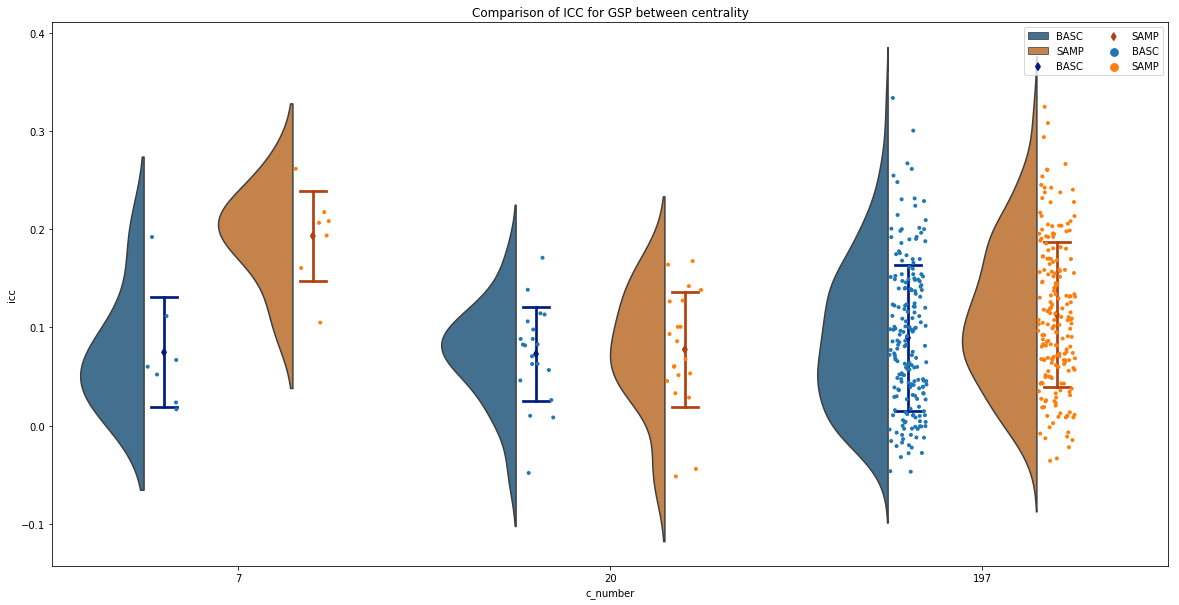

In [74]:
icc=[]
Type=[]
clus=[]


for i in ['007', '020', '197']:
    f = open('/data3/aki/ytong/NetworkX/GSP_time_a_BASC_'+i+'_10/between_cen.pkl', 'rb')
    b = np.array(pkl.load(f))
    f.close()
    f = open('/data3/aki/ytong/NetworkX/GSP_time_b_BASC_'+i+'_10/between_cen.pkl', 'rb')
    bb = np.array(pkl.load(f))
    f.close()
    
    
    f = open('/data3/aki/ytong/NetworkX/GSP_time_a_samp_'+str(int(i))+'_10/between_cen.pkl', 'rb')
    s = np.array(pkl.load(f))
    f.close()
    f = open('/data3/aki/ytong/NetworkX/GSP_time_b_samp_'+str(int(i))+'_10/between_cen.pkl', 'rb')
    ss = np.array(pkl.load(f))
    f.close()
    
    icc_b = [ICC(np.transpose(np.array([b[:, j], bb[:,j]]))) for j in range(b.shape[1])] 
    tyep_b = ['BASC' for j in range(b.shape[1])]
    
    icc_s = [ICC(np.transpose(np.array([s[:, j], ss[:,j]]))) for j in range(s.shape[1])] 
    tyep_s = ['SAMP' for j in range(b.shape[1])]
    
    c_number = [int(i) for j in range(2*s.shape[1])]
    
    icc += icc_b
    icc += icc_s
    
    Type += tyep_b
    Type += tyep_s
    
    clus += c_number
    
    
t1,p1 = stats.ttest_ind(icc_msr[0:int(len(icc_msr)/3)],icc_msr[int(len(icc_msr)/3):int(len(icc_msr)/3*2)], nan_policy ='omit', equal_var=False)
t2,p2 = stats.ttest_ind(icc_msr[0:int(len(icc_msr)/3)],icc_msr[int(len(icc_msr)/3*2):], nan_policy ='omit', equal_var=False)
    
plt.text(-0.15,0,'T: '+str(round(t1,5))+'\n'+'P: '+str(round(p1,5)),fontsize=18)
plt.text(0.15,0,'T: '+str(round(t2,5))+'\n'+'P: '+str(round(p2,5)),fontsize=18)
plt.legend(ncol=2)       
plt.savefig(plotd+'icc_msr.png')######
plt.close()    

data = pd.DataFrame({'icc':icc, 'c_number':clus, 'origin': Type})

plt.figure(figsize=(20, 10))
sns.pointplot(x="c_number", y="icc", data=data, hue= 'origin', dodge=0.4, join=False, palette="dark",markers="d", scale=.75, ci='sd',capsize = 0.07)
sns.stripplot(x="c_number", y="icc", data=data, hue= 'origin', size = 4, dodge=0.1, alpha = 1).set_title('Comparison of ICC for GSP between centrality')
pt.half_violinplot(x="c_number", y="icc", data=data, hue= 'origin', scale = "area",inner = None, offset = 0.055, saturation=0.5)
plt.legend(ncol=2)   

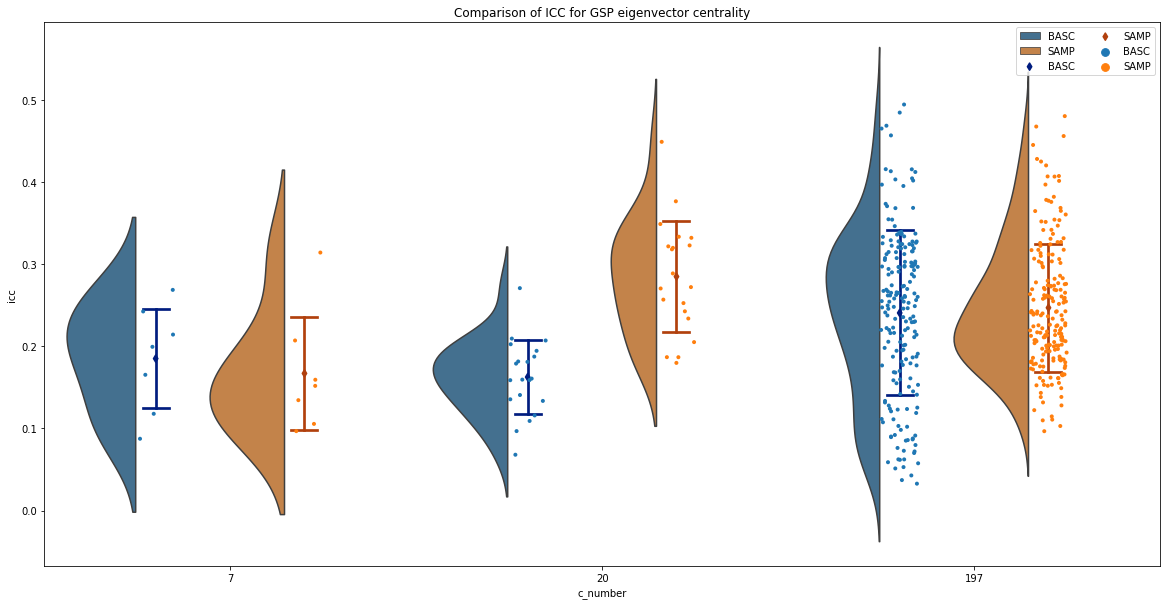

In [73]:
icc=[]
Type=[]
clus=[]


for i in ['007', '020', '197']:
    f = open('/data3/aki/ytong/NetworkX/GSP_time_a_BASC_'+i+'_10/eigen_cen.pkl', 'rb')
    b = np.array(pkl.load(f))
    f.close()
    f = open('/data3/aki/ytong/NetworkX/GSP_time_b_BASC_'+i+'_10/eigen_cen.pkl', 'rb')
    bb = np.array(pkl.load(f))
    f.close()
    
    
    f = open('/data3/aki/ytong/NetworkX/GSP_time_a_samp_'+str(int(i))+'_10/eigen_cen.pkl', 'rb')
    s = np.array(pkl.load(f))
    f.close()
    f = open('/data3/aki/ytong/NetworkX/GSP_time_b_samp_'+str(int(i))+'_10/eigen_cen.pkl', 'rb')
    ss = np.array(pkl.load(f))
    f.close()
    
    icc_b = [ICC(np.transpose(np.array([b[:, j], bb[:,j]]))) for j in range(b.shape[1])] 
    tyep_b = ['BASC' for j in range(b.shape[1])]
    
    icc_s = [ICC(np.transpose(np.array([s[:, j], ss[:,j]]))) for j in range(s.shape[1])] 
    tyep_s = ['SAMP' for j in range(b.shape[1])]
    
    c_number = [int(i) for j in range(2*s.shape[1])]
    
    icc += icc_b
    icc += icc_s
    
    Type += tyep_b
    Type += tyep_s
    
    clus += c_number
    
    
    

data = pd.DataFrame({'icc':icc, 'c_number':clus, 'origin': Type})

plt.figure(figsize=(20, 10))
sns.pointplot(x="c_number", y="icc", data=data, hue= 'origin', dodge=0.4, join=False, palette="dark",markers="d", scale=.75, ci='sd',capsize = 0.07)
sns.stripplot(x="c_number", y="icc", data=data, hue= 'origin', size = 4, dodge=0.1, alpha = 1).set_title('Comparison of ICC for GSP eigenvector centrality')
pt.half_violinplot(x="c_number", y="icc", data=data, hue= 'origin', scale = "area",inner = None, offset = 0.055, saturation=0.5)
plt.legend(ncol=2)   

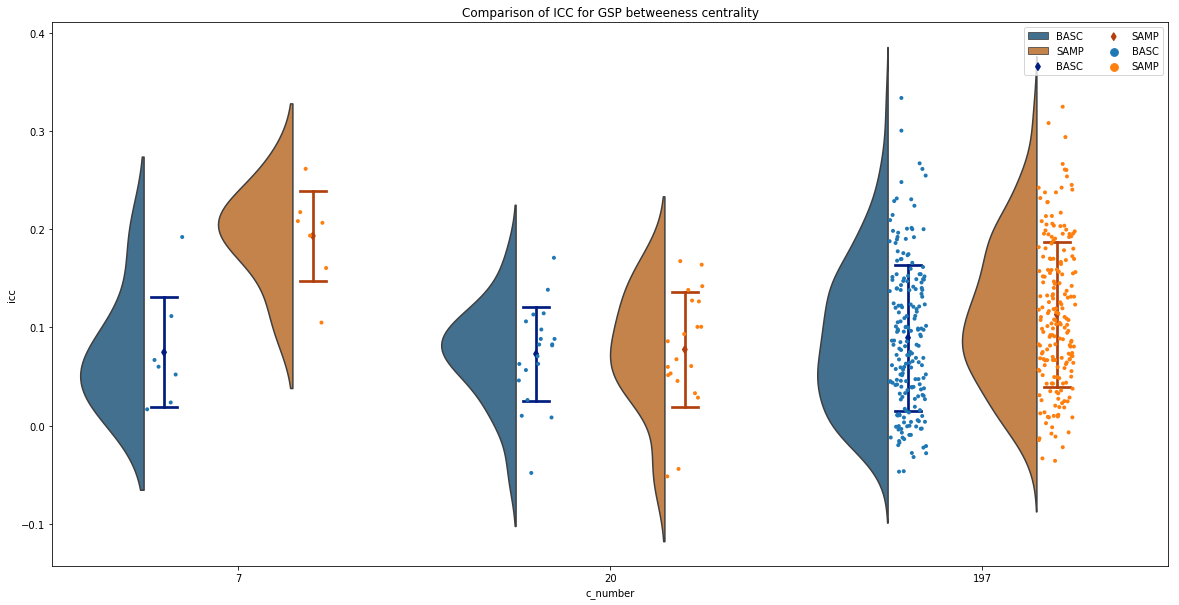

In [76]:
icc=[]
Type=[]
clus=[]


for i in ['007', '020', '197']:
    f = open('/data3/aki/ytong/NetworkX/GSP_time_a_BASC_'+i+'_10/between_cen.pkl', 'rb')
    b = np.array(pkl.load(f))
    f.close()
    f = open('/data3/aki/ytong/NetworkX/GSP_time_b_BASC_'+i+'_10/between_cen.pkl', 'rb')
    bb = np.array(pkl.load(f))
    f.close()
    
    
    f = open('/data3/aki/ytong/NetworkX/GSP_time_a_samp_'+str(int(i))+'_10/between_cen.pkl', 'rb')
    s = np.array(pkl.load(f))
    f.close()
    f = open('/data3/aki/ytong/NetworkX/GSP_time_b_samp_'+str(int(i))+'_10/between_cen.pkl', 'rb')
    ss = np.array(pkl.load(f))
    f.close()
    
    icc_b = [ICC(np.transpose(np.array([b[:, j], bb[:,j]]))) for j in range(b.shape[1])] 
    tyep_b = ['BASC' for j in range(b.shape[1])]
    
    icc_s = [ICC(np.transpose(np.array([s[:, j], ss[:,j]]))) for j in range(s.shape[1])] 
    tyep_s = ['SAMP' for j in range(b.shape[1])]
    
    c_number = [int(i) for j in range(2*s.shape[1])]
    
    icc += icc_b
    icc += icc_s
    
    Type += tyep_b
    Type += tyep_s
    
    clus += c_number
    
    
    

data = pd.DataFrame({'icc':icc, 'c_number':clus, 'origin': Type})

plt.figure(figsize=(20, 10))
sns.pointplot(x="c_number", y="icc", data=data, hue= 'origin', dodge=0.4, join=False, palette="dark",markers="d", scale=.75, ci='sd',capsize = 0.07)
sns.stripplot(x="c_number", y="icc", data=data, hue= 'origin', size = 4, dodge=0.1, alpha = 1).set_title('Comparison of ICC for GSP betweeness centrality')
pt.half_violinplot(x="c_number", y="icc", data=data, hue= 'origin', scale = "area",inner = None, offset = 0.055, saturation=0.5)
plt.legend(ncol=2)   

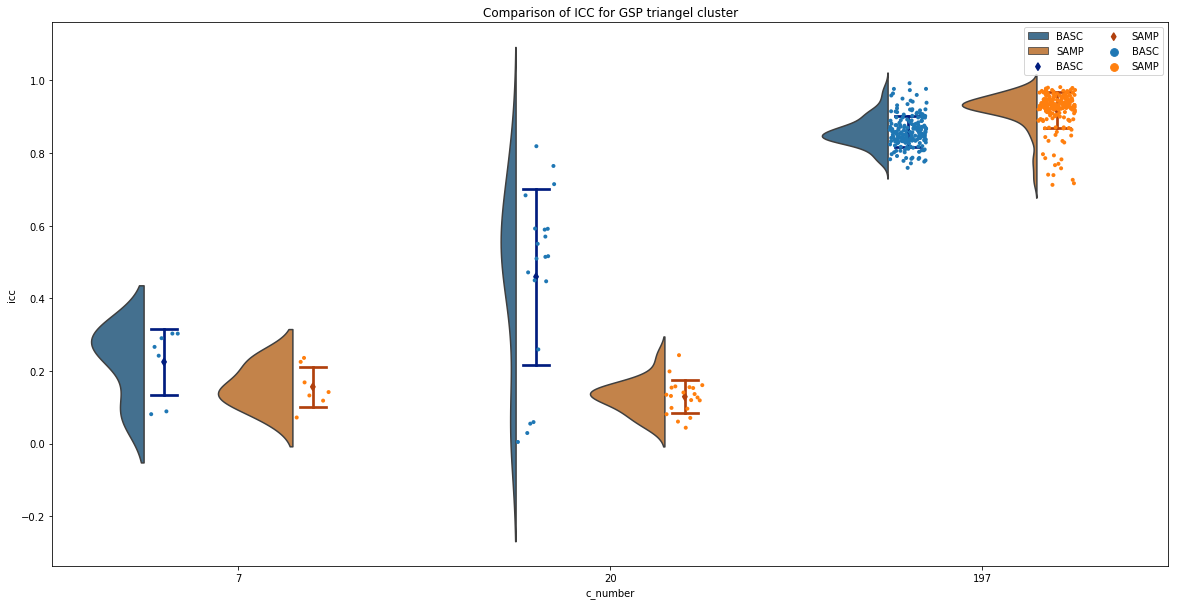

In [78]:
icc=[]
Type=[]
clus=[]


for i in ['007', '020', '197']:
    f = open('/data3/aki/ytong/NetworkX/GSP_time_a_BASC_'+i+'_10/tri_clu.pkl', 'rb')
    b = np.array(pkl.load(f))
    f.close()
    f = open('/data3/aki/ytong/NetworkX/GSP_time_b_BASC_'+i+'_10/tri_clu.pkl', 'rb')
    bb = np.array(pkl.load(f))
    f.close()
    
    
    f = open('/data3/aki/ytong/NetworkX/GSP_time_a_samp_'+str(int(i))+'_10/tri_clu.pkl', 'rb')
    s = np.array(pkl.load(f))
    f.close()
    f = open('/data3/aki/ytong/NetworkX/GSP_time_b_samp_'+str(int(i))+'_10/tri_clu.pkl', 'rb')
    ss = np.array(pkl.load(f))
    f.close()
    
    icc_b = [ICC(np.transpose(np.array([b[:, j], bb[:,j]]))) for j in range(b.shape[1])] 
    tyep_b = ['BASC' for j in range(b.shape[1])]
    
    icc_s = [ICC(np.transpose(np.array([s[:, j], ss[:,j]]))) for j in range(s.shape[1])] 
    tyep_s = ['SAMP' for j in range(b.shape[1])]
    
    c_number = [int(i) for j in range(2*s.shape[1])]
    
    icc += icc_b
    icc += icc_s
    
    Type += tyep_b
    Type += tyep_s
    
    clus += c_number
    
    
    

data = pd.DataFrame({'icc':icc, 'c_number':clus, 'origin': Type})

plt.figure(figsize=(20, 10))
sns.pointplot(x="c_number", y="icc", data=data, hue= 'origin', dodge=0.4, join=False, palette="dark",markers="d", scale=.75, ci='sd',capsize = 0.07)
sns.stripplot(x="c_number", y="icc", data=data, hue= 'origin', size = 4, dodge=0.1, alpha = 1).set_title('Comparison of ICC for GSP triangel cluster')
pt.half_violinplot(x="c_number", y="icc", data=data, hue= 'origin', scale = "area",inner = None, offset = 0.055, saturation=0.5)
plt.legend(ncol=2)   

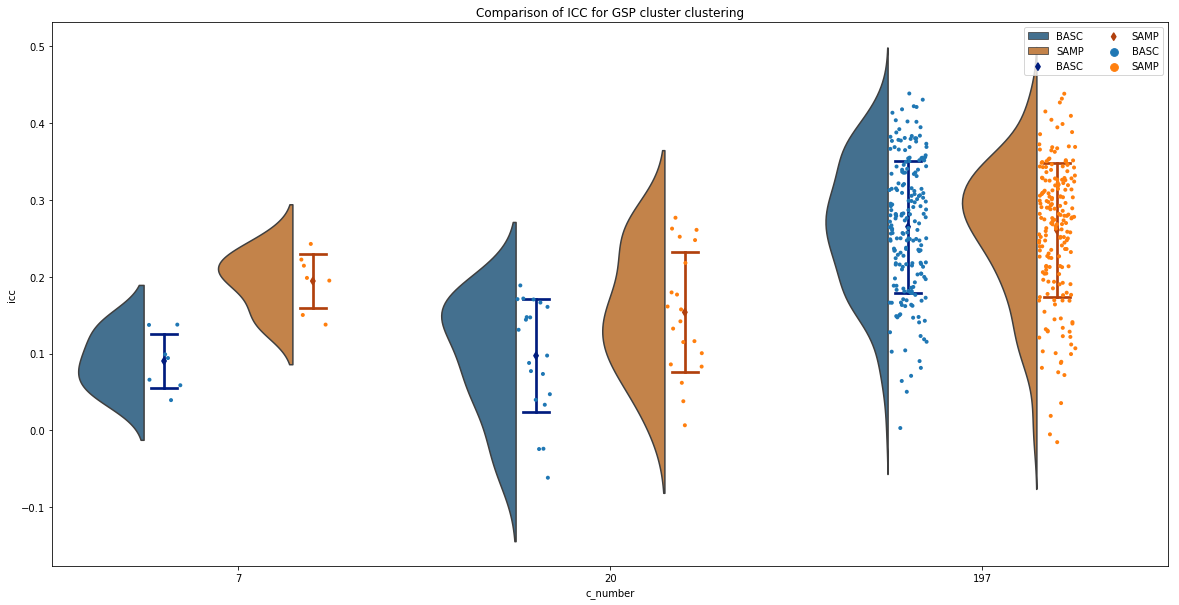

In [79]:
icc=[]
Type=[]
clus=[]


for i in ['007', '020', '197']:
    f = open('/data3/aki/ytong/NetworkX/GSP_time_a_BASC_'+i+'_10/clu_clu.pkl', 'rb')
    b = np.array(pkl.load(f))
    f.close()
    f = open('/data3/aki/ytong/NetworkX/GSP_time_b_BASC_'+i+'_10/clu_clu.pkl', 'rb')
    bb = np.array(pkl.load(f))
    f.close()
    
    
    f = open('/data3/aki/ytong/NetworkX/GSP_time_a_samp_'+str(int(i))+'_10/clu_clu.pkl', 'rb')
    s = np.array(pkl.load(f))
    f.close()
    f = open('/data3/aki/ytong/NetworkX/GSP_time_b_samp_'+str(int(i))+'_10/clu_clu.pkl', 'rb')
    ss = np.array(pkl.load(f))
    f.close()
    
    icc_b = [ICC(np.transpose(np.array([b[:, j], bb[:,j]]))) for j in range(b.shape[1])] 
    tyep_b = ['BASC' for j in range(b.shape[1])]
    
    icc_s = [ICC(np.transpose(np.array([s[:, j], ss[:,j]]))) for j in range(s.shape[1])] 
    tyep_s = ['SAMP' for j in range(b.shape[1])]
    
    c_number = [int(i) for j in range(2*s.shape[1])]
    
    icc += icc_b
    icc += icc_s
    
    Type += tyep_b
    Type += tyep_s
    
    clus += c_number
    
    
    

data = pd.DataFrame({'icc':icc, 'c_number':clus, 'origin': Type})

plt.figure(figsize=(20, 10))
sns.pointplot(x="c_number", y="icc", data=data, hue= 'origin', dodge=0.4, join=False, palette="dark",markers="d", scale=.75, ci='sd',capsize = 0.07)
sns.stripplot(x="c_number", y="icc", data=data, hue= 'origin', size = 4, dodge=0.1, alpha = 1).set_title('Comparison of ICC for GSP cluster clustering')
pt.half_violinplot(x="c_number", y="icc", data=data, hue= 'origin', scale = "area",inner = None, offset = 0.055, saturation=0.5)
plt.legend(ncol=2)   

In [ ]:
icc=[]
Type=[]
clus=[]


for i in ['007', '020', '197']:
    f = open('/data3/aki/ytong/NetworkX/GSP_time_a_BASC_'+i+'_10/clu_clu.pkl', 'rb')
    b = np.array(pkl.load(f))
    f.close()
    f = open('/data3/aki/ytong/NetworkX/GSP_time_b_BASC_'+i+'_10/clu_clu.pkl', 'rb')
    bb = np.array(pkl.load(f))
    f.close()
    
    
    f = open('/data3/aki/ytong/NetworkX/GSP_time_a_samp_'+str(int(i))+'_10/clu_clu.pkl', 'rb')
    s = np.array(pkl.load(f))
    f.close()
    f = open('/data3/aki/ytong/NetworkX/GSP_time_b_samp_'+str(int(i))+'_10/clu_clu.pkl', 'rb')
    ss = np.array(pkl.load(f))
    f.close()
    
    icc_b = [ICC(np.transpose(np.array([b[:, j], bb[:,j]]))) for j in range(b.shape[1])] 
    tyep_b = ['BASC' for j in range(b.shape[1])]
    
    icc_s = [ICC(np.transpose(np.array([s[:, j], ss[:,j]]))) for j in range(s.shape[1])] 
    tyep_s = ['SAMP' for j in range(b.shape[1])]
    
    c_number = [int(i) for j in range(2*s.shape[1])]
    
    icc += icc_b
    icc += icc_s
    
    Type += tyep_b
    Type += tyep_s
    
    clus += c_number
    
    
    

data = pd.DataFrame({'icc':icc, 'c_number':clus, 'origin': Type})

plt.figure(figsize=(20, 10))
sns.pointplot(x="c_number", y="icc", data=data, hue= 'origin', dodge=0.4, join=False, palette="dark",markers="d", scale=.75, ci='sd',capsize = 0.07)
sns.stripplot(x="c_number", y="icc", data=data, hue= 'origin', size = 4, dodge=0.1, alpha = 1).set_title('Comparison of ICC for GSP cluster clustering')
pt.half_violinplot(x="c_number", y="icc", data=data, hue= 'origin', scale = "area",inner = None, offset = 0.055, saturation=0.5)
plt.legend(ncol=2)   

In [ ]:



percentile = 10
folder = '_'.join(file.split('/')[4:7])+'_'+str(percentile)
#os.makedirs('/data3/aki/ytong/NetworkX/'+folder,exist_ok=True)
#save_net(file, percentile, '/data3/aki/ytong/NetworkX/'+folder+'/')

In [ ]:
for file in [i for i in [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser('/data3/aki/ytong/HNU/')) for f in fn] if 'correlation' in i and '197' in i]:
    percentile = 10
    folder = '_'.join(file.split('/')[4:7])+'_'+str(percentile)
    os.makedirs('/data3/aki/ytong/NetworkX/'+folder,exist_ok=True)
    save_net(file, percentile, '/data3/aki/ytong/NetworkX/'+folder+'/')
    











/home/ytong/miniconda3/envs/tony/lib/python3.7/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/ytong/miniconda3/envs/tony/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [7]:
import os

files = ['Ref_correlation_t0.pkl', 'Rep_5_correlation_t0.pkl', 'Rep_50_correlation_t0.pkl']
folders = ['HNU_Ref_BASC_197_10', 'HNU_Rep_5_BASC_197_10', 'HNU_Rep_50_BASC_197_10']

for i in range(3):
    percentile = 10
    file = files[i]
    folder = folders[i]
    os.makedirs('/data3/aki/ytong/NetworkX/'+folder,exist_ok=True)
    save_net('/data3/cdb/ytong/Ensemble/BASC_197/distance/'+file, percentile, '/data3/aki/ytong/NetworkX/'+folder+'/')
    





/home/ytong/miniconda3/envs/tony/lib/python3.7/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/ytong/miniconda3/envs/tony/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [51]:
def plotdd(file, metric, height, path = None):
    icc=[]
    Type=[]
    clus=[]
    
    f = open('/data3/aki/ytong/NetworkX/HNU_Ref_BASC_197_10/'+file, 'rb')
    b = np.array(pkl.load(f))
    f.close()
    f = open('/data3/aki/ytong/NetworkX/HNU_Rep_5_BASC_197_10/'+file, 'rb')
    bb = np.array(pkl.load(f))
    f.close()
        
        
    f = open('/data3/aki/ytong/NetworkX/HNU_Ref_samp_197_10/'+file, 'rb')
    s = np.array(pkl.load(f))
    f.close()
    f = open('/data3/aki/ytong/NetworkX/HNU_Rep_5_samp_197_10/'+file, 'rb')
    ss = np.array(pkl.load(f))
    f.close()
        
    icc_b = [ICC(np.transpose(np.array([b[:, j], bb[:,j]]))) for j in range(b.shape[1])] 
    tyep_b = ['BASC' for j in range(b.shape[1])]
        
    icc_s = [ICC(np.transpose(np.array([s[:, j], ss[:,j]]))) for j in range(s.shape[1])] 
    tyep_s = ['SAMP' for j in range(b.shape[1])]
        
    c_number = ['HNU_Ref_Rep_5' for j in range(2*s.shape[1])]
        
    icc += icc_b
    icc += icc_s
        
    Type += tyep_b
    Type += tyep_s
        
    clus += c_number
    t1,p1 = stats.ttest_ind(icc_b,icc_s, nan_policy ='omit', equal_var=False)
    
    
    
    f = open('/data3/aki/ytong/NetworkX/HNU_Ref_BASC_197_10/'+file, 'rb')
    b = np.array(pkl.load(f))
    f.close()
    f = open('/data3/aki/ytong/NetworkX/HNU_Rep_50_BASC_197_10/'+file, 'rb')
    bb = np.array(pkl.load(f))
    f.close()
        
        
    f = open('/data3/aki/ytong/NetworkX/HNU_Ref_samp_197_10/'+file, 'rb')
    s = np.array(pkl.load(f))
    f.close()
    f = open('/data3/aki/ytong/NetworkX/HNU_Rep_50_samp_197_10/'+file, 'rb')
    ss = np.array(pkl.load(f))
    f.close()
        
    icc_b = [ICC(np.transpose(np.array([b[:, j], bb[:,j]]))) for j in range(b.shape[1])] 
    tyep_b = ['BASC' for j in range(b.shape[1])]
        
    icc_s = [ICC(np.transpose(np.array([s[:, j], ss[:,j]]))) for j in range(s.shape[1])] 
    tyep_s = ['SAMP' for j in range(b.shape[1])]
        
    c_number = ['HNU_Ref_Rep_50' for j in range(2*s.shape[1])]
        
    icc += icc_b
    icc += icc_s
        
    Type += tyep_b
    Type += tyep_s
        
    clus += c_number
    t2,p2 = stats.ttest_ind(icc_b,icc_s, nan_policy ='omit', equal_var=False)
    
    
    f = open('/data3/aki/ytong/NetworkX/GSP_time_a_BASC_197_10/'+file, 'rb')
    b = np.array(pkl.load(f))
    f.close()
    f = open('/data3/aki/ytong/NetworkX/GSP_time_b_BASC_197_10/'+file, 'rb')
    bb = np.array(pkl.load(f))
    f.close()
        
        
    f = open('/data3/aki/ytong/NetworkX/GSP_time_a_samp_197_10/'+file, 'rb')
    s = np.array(pkl.load(f))
    f.close()
    f = open('/data3/aki/ytong/NetworkX/GSP_time_b_samp_197_10/'+file, 'rb')
    ss = np.array(pkl.load(f))
    f.close()
        
    icc_b = [ICC(np.transpose(np.array([b[:, j], bb[:,j]]))) for j in range(b.shape[1])] 
    tyep_b = ['BASC' for j in range(b.shape[1])]
        
    icc_s = [ICC(np.transpose(np.array([s[:, j], ss[:,j]]))) for j in range(s.shape[1])] 
    tyep_s = ['SAMP' for j in range(b.shape[1])]
        
    c_number = ['GSP' for j in range(2*s.shape[1])]
    
    icc += icc_b
    icc += icc_s
        
    Type += tyep_b
    Type += tyep_s
        
    clus += c_number
    t3,p3 = stats.ttest_ind(icc_b,icc_s, nan_policy ='omit', equal_var=False)   
        
    
    data = pd.DataFrame({'icc':icc, 'data':clus, 'origin': Type})
    
    plt.figure(figsize=(20, 10))
    sns.pointplot(x="data", y="icc", data=data, hue= 'origin', dodge=0.4, join=False, palette="dark",markers="d", scale=.75, ci='sd',capsize = 0.07)
    sns.stripplot(x="data", y="icc", data=data, hue= 'origin', size = 4, dodge=0.1, alpha = 0.5).set_title('Comparison of '+metric)
    pt.half_violinplot(x="data", y="icc", data=data, hue= 'origin', scale = "area",inner = None, offset = 0.055, saturation=0.5)
    plt.text(0.15,height,'T: '+str(round(t1,5))+'\n'+'P: '+str(round(p1,5)),fontsize=18)
    plt.text(1.15,height,'T: '+str(round(t2,5))+'\n'+'P: '+str(round(p2,5)),fontsize=18)    
    plt.text(2+0.15,height,'T: '+str(round(t3,5))+'\n'+'P: '+str(round(p3,5)),fontsize=18)  
       
    plt.legend(ncol=2)
    
    if path != None:
        plt.savefig(path)

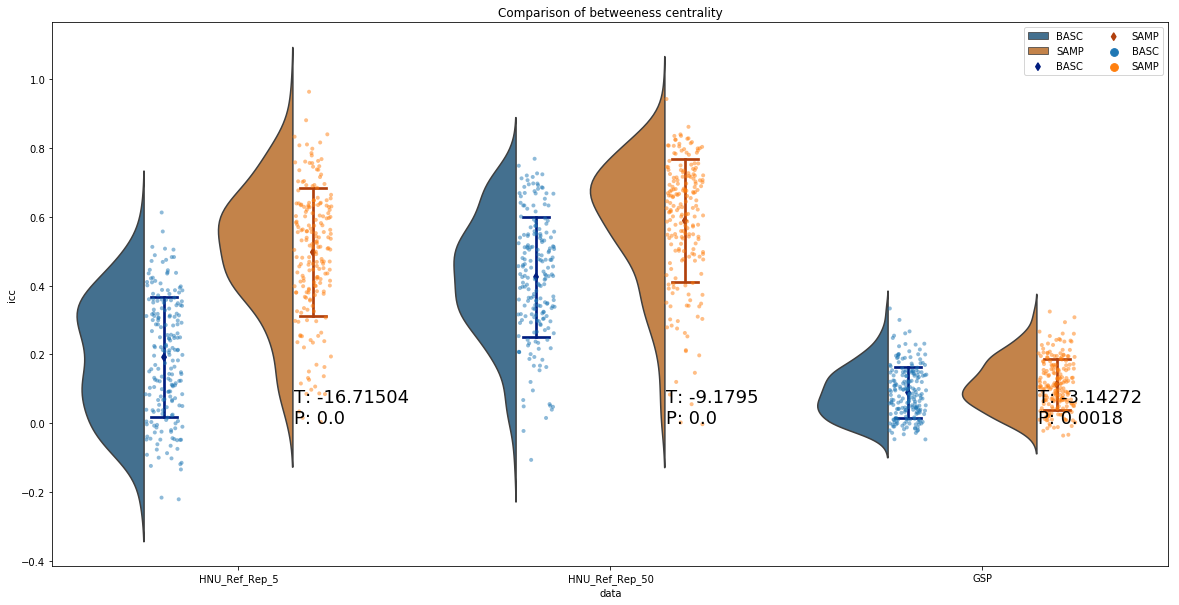

In [53]:
plotdd('between_cen.pkl', 'betweeness centrality',0)

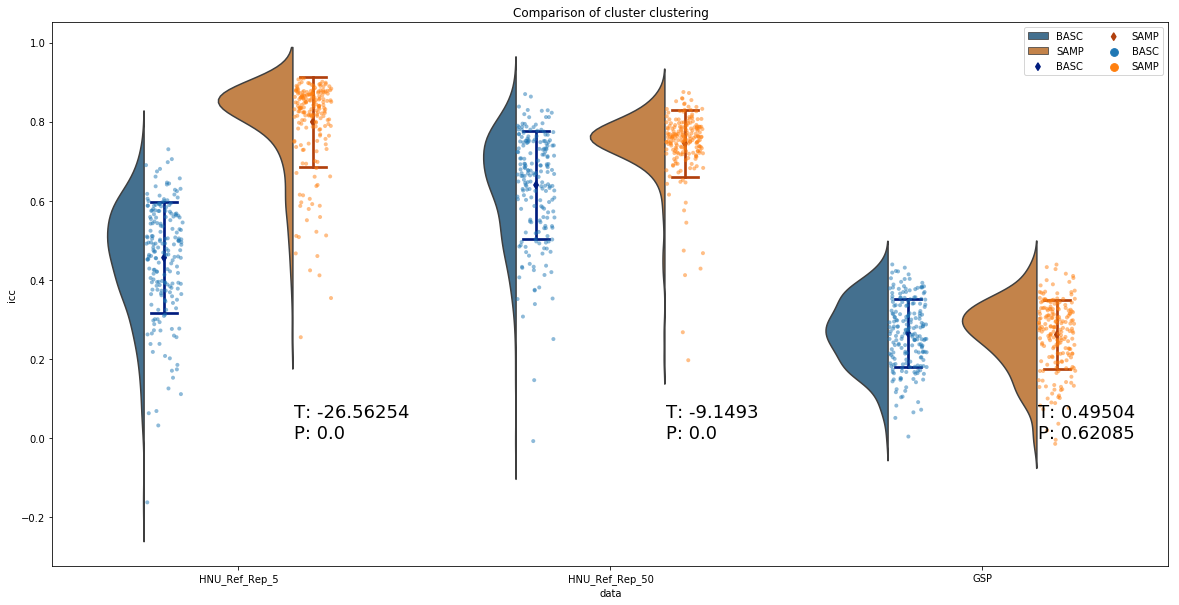

In [45]:
plotdd('clu_clu.pkl', 'cluster clustering')

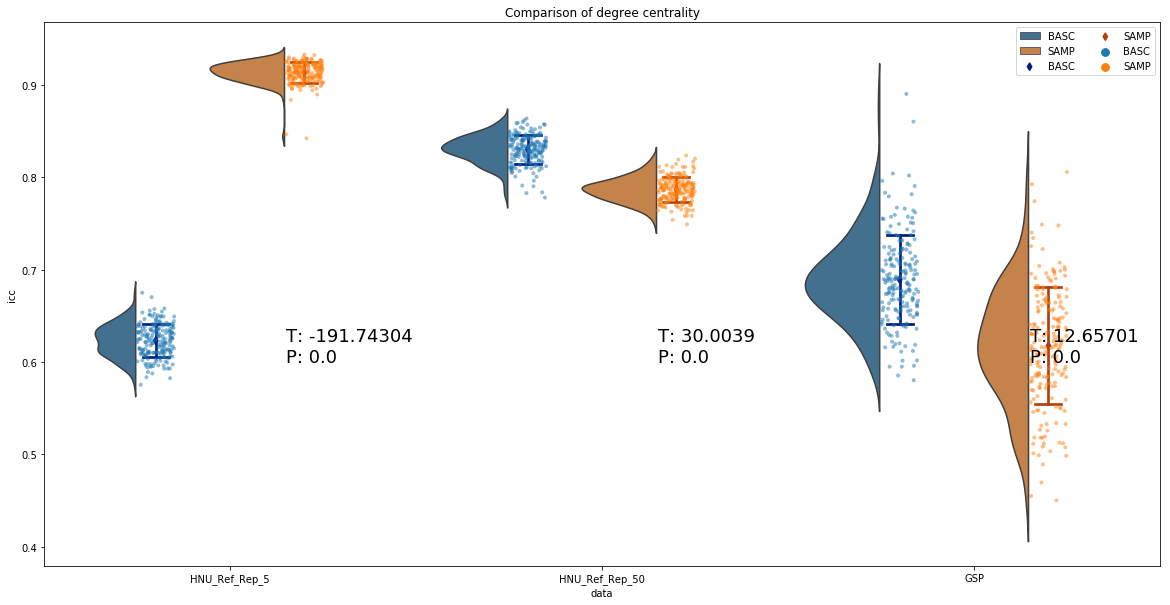

In [54]:
plotdd('degree_cen.pkl', 'degree centrality',0.6)

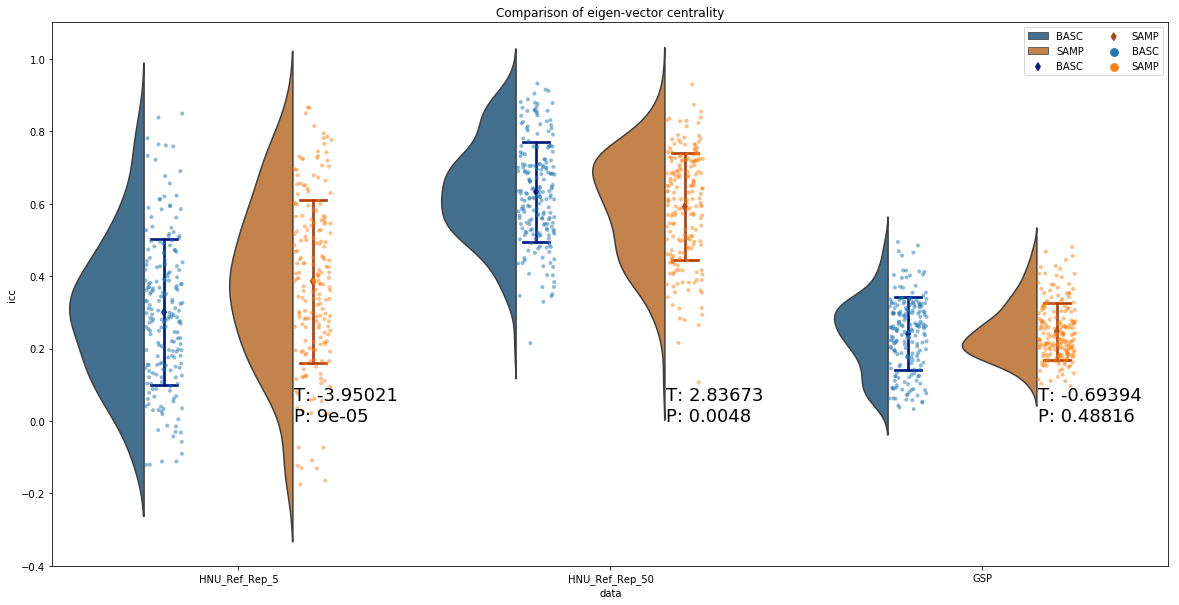

In [47]:
plotdd('eigen_cen.pkl', 'eigen-vector centrality')

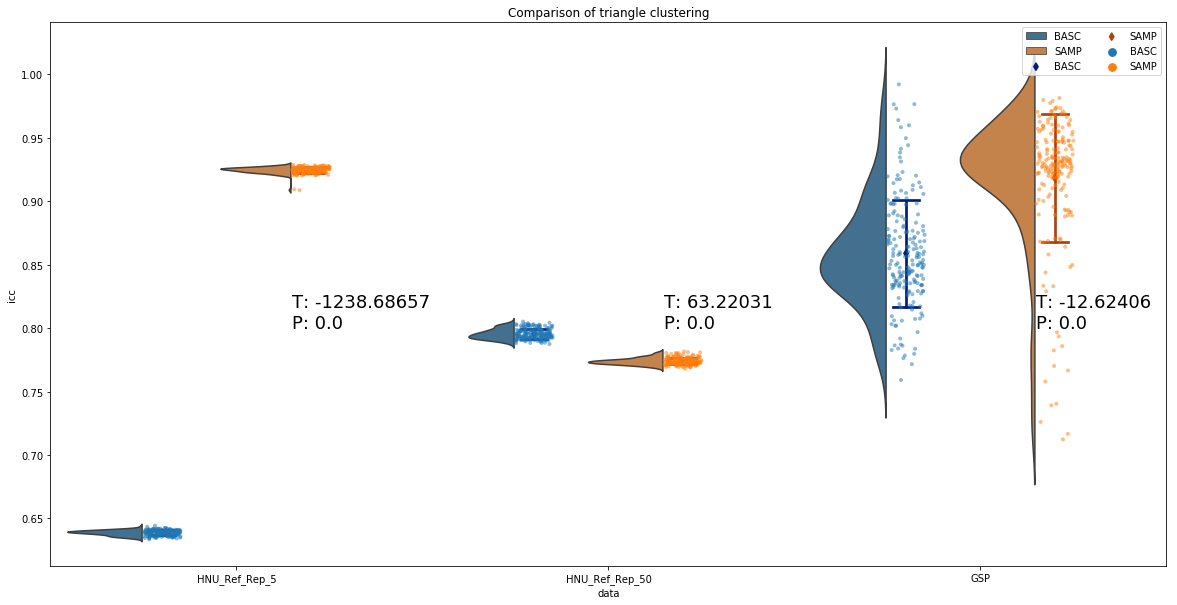

In [55]:
plotdd('tri_clu.pkl', 'triangle clustering',0.8)